In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Load the commodity price data
commodity_data = pd.read_csv('Sugar16Futures_SF_NYB.csv')
commodity_data = commodity_data.rename(columns={'Date': 'DATE'})
commodity_data = commodity_data.set_index('DATE')

# Load the weather data for different locations
weather_data_arg = pd.read_csv('Argentina_Weather.csv', index_col='DATE')
weather_data_bra = pd.read_csv('Brazil_Weather.csv', index_col='DATE')
weather_data_cal = pd.read_csv('California_Weather.csv', index_col='DATE')
weather_data_ill = pd.read_csv('Illinois_Weather.csv', index_col='DATE')
weather_data_iow = pd.read_csv('Iowa_Weather.csv', index_col='DATE')
weather_data_min = pd.read_csv('Minnesota_Weather.csv', index_col='DATE')
weather_data_neb = pd.read_csv('Nebraska_Weather.csv', index_col='DATE')

In [3]:
commodity_data

,Open,High,Low,Close,Adj Close,Volume
DATE,,,,,,
2018-01-02,1.0343,1.0365,1.0313,1.0343,1.0343,23152
2018-01-03,1.0288,1.0350,1.0258,1.0288,1.0288,25655
2018-01-04,1.0310,1.0321,1.0275,1.0310,1.0310,17166
2018-01-05,1.0301,1.0317,1.0269,1.0301,1.0301,20919
2018-01-08,1.0276,1.0309,1.0269,1.0276,1.0276,19659
...,...,...,...,...,...,...
2020-05-22,1.0288,1.0317,1.0279,1.0288,1.0288,17962
2020-05-26,1.0368,1.0372,1.0277,1.0368,1.0368,22899
2020-05-27,1.0327,1.0365,1.0285,1.0327,1.0327,29845


In [4]:
# Merge the commodity data and weather data into a single DataFrame
data_arg = pd.merge(commodity_data, weather_data_arg, on='DATE')
data_bra = pd.merge(commodity_data, weather_data_bra, on='DATE')
data_cal = pd.merge(commodity_data, weather_data_cal, on='DATE')
data_ill = pd.merge(commodity_data, weather_data_ill, on='DATE')
data_iow = pd.merge(commodity_data, weather_data_iow, on='DATE')
data_min = pd.merge(commodity_data, weather_data_min, on='DATE')
data_neb = pd.merge(commodity_data, weather_data_neb, on='DATE')

In [5]:
data_arg

,Open,High,Low,Close,Adj Close,Volume,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,,,,,,,
2018-01-02,1.0343,1.0365,1.0313,1.0343,1.0343,23152,22.109231,34.2,4.8,0.108906,7.169231
2018-01-03,1.0288,1.0350,1.0258,1.0288,1.0288,25655,23.378462,38.7,4.0,0.030156,7.518462
2018-01-04,1.0310,1.0321,1.0275,1.0310,1.0310,17166,25.525000,41.1,3.5,0.028889,9.192187
2018-01-05,1.0301,1.0317,1.0269,1.0301,1.0301,20919,23.567692,42.0,5.8,0.126230,9.741538
2018-01-08,1.0276,1.0309,1.0269,1.0276,1.0276,19659,25.449231,41.5,4.1,0.006885,7.047692
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-22,1.0288,1.0317,1.0279,1.0288,1.0288,17962,10.250667,29.6,-9.2,0.276567,9.386667
2020-05-26,1.0368,1.0372,1.0277,1.0368,1.0368,22899,12.357143,29.6,-5.5,0.008947,5.413158
2020-05-27,1.0327,1.0365,1.0285,1.0327,1.0327,29845,12.966234,31.0,-4.8,0.001818,5.423684


In [6]:
train_data_arg = data_arg[:-21]
test_data_arg = data_arg[-21:]

train_data_bra = data_bra[:-21]
test_data_bra = data_bra[-21:]

train_data_cal = data_cal[:-21]
test_data_cal = data_cal[-21:]

train_data_ill = data_ill[:-21]
test_data_ill = data_ill[-21:]

train_data_iow = data_iow[:-21]
test_data_iow = data_iow[-21:]

train_data_min = data_min[:-21]
test_data_min = data_min[-21:]

train_data_neb = data_neb[:-21]
test_data_neb = data_neb[-21:]


In [7]:
test_data_arg.shape

(21, 11)

In [8]:
# For ARG
exog_train_arg = train_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_arg = test_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For BRA
exog_train_bra = train_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_bra = test_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For CAL
exog_train_cal = train_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_cal = test_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For ILL
exog_train_ill = train_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_ill = test_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For IOW
exog_train_iow = train_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_iow = test_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For MIN
exog_train_min = train_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_min = test_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For NEB
exog_train_neb = train_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_neb = test_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]


In [9]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [ ]:
order = (0,1,0)
# For ARG
model_arg = sm.tsa.ARIMA(train_data_arg['Close'], order=order, exog=exog_train_arg)
result_arg = model_arg.fit()

# For BRA
model_bra = sm.tsa.ARIMA(train_data_bra['Close'], order=order, exog=exog_train_bra)
result_bra = model_bra.fit()

# For CAL
model_cal = sm.tsa.ARIMA(train_data_cal['Close'], order=order, exog=exog_train_cal)
result_cal = model_cal.fit()

# For ILL
model_ill = sm.tsa.ARIMA(train_data_ill['Close'], order=order, exog=exog_train_ill)
result_ill = model_ill.fit()

# For IOW
model_iow = sm.tsa.ARIMA(train_data_iow['Close'], order=order, exog=exog_train_iow)
result_iow = model_iow.fit()

# For MIN
model_min = sm.tsa.ARIMA(train_data_min['Close'], order=order, exog=exog_train_min)
result_min = model_min.fit()

# For NEB
model_neb = sm.tsa.ARIMA(train_data_neb['Close'], order=order, exog=exog_train_neb)
result_neb = model_neb.fit()


In [11]:
import matplotlib.pyplot as plt
# For ARG
pred_arg = result_arg.forecast(steps=21, exog=exog_test_arg)
pred_arg = pd.DataFrame(pred_arg[0], index=test_data_arg.index, columns=['Predictions_ARG'])

# For BRA
pred_bra = result_bra.forecast(steps=21, exog=exog_test_bra)
pred_bra = pd.DataFrame(pred_bra[0], index=test_data_bra.index, columns=['Predictions_BRA'])

# For CAL
pred_cal = result_cal.forecast(steps=21, exog=exog_test_cal)
pred_cal = pd.DataFrame(pred_cal[0], index=test_data_cal.index, columns=['Predictions_CAL'])

# For ILL
pred_ill = result_ill.forecast(steps=21, exog=exog_test_ill)
pred_ill = pd.DataFrame(pred_ill[0], index=test_data_ill.index, columns=['Predictions_ILL'])

# For IOW
pred_iow = result_iow.forecast(steps=21, exog=exog_test_iow)
pred_iow = pd.DataFrame(pred_iow[0], index=test_data_iow.index, columns=['Predictions_IOW'])

# For MIN
pred_min = result_min.forecast(steps=21, exog=exog_test_min)
pred_min = pd.DataFrame(pred_min[0], index=test_data_min.index, columns=['Predictions_MIN'])

# For NEB
pred_neb = result_neb.forecast(steps=21, exog=exog_test_neb)
pred_neb = pd.DataFrame(pred_neb[0], index=test_data_neb.index, columns=['Predictions_NEB'])




                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  584
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2353.111
Method:                           css   S.D. of innovations              0.004
Date:                Sat, 08 Apr 2023   AIC                          -4696.221
Time:                        00:50:58   BIC                          -4674.372
Sample:                             1   HQIC                         -4687.706
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.731e-05      0.001     -0.102      0.919      -0.002       0.002
Mean_Temp      -2.186e-06    3.5e-05     -0.062      0.950   -7.08e-05    6.64e-05
Mean_Precip       -0.0012      0.002

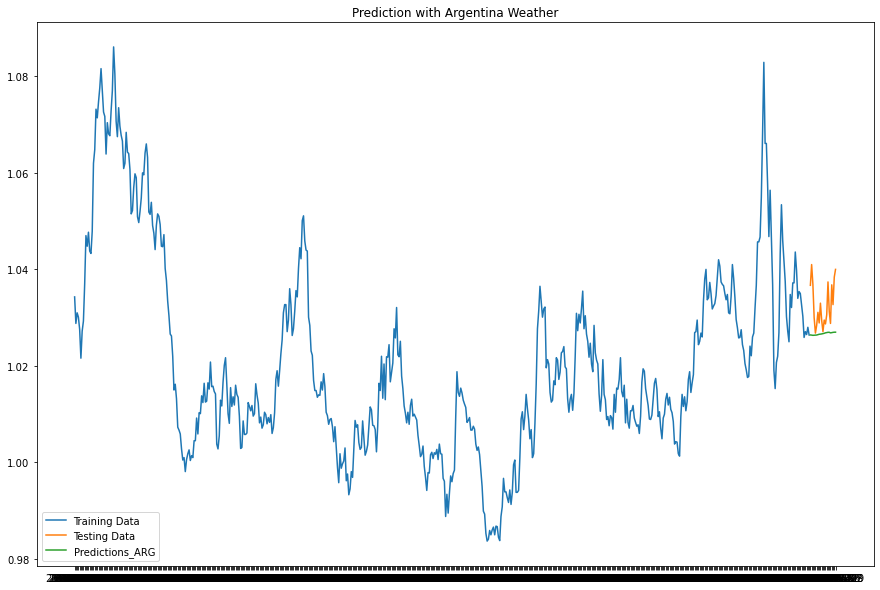

In [12]:
print(result_arg.summary())

# Plot the predicted values
plt.figure(figsize=(15, 10))

plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_arg.index, pred_arg['Predictions_ARG'], label='Predictions_ARG')

plt.title('Prediction with Argentina Weather')
plt.legend(loc='best')
plt.show()

In [13]:
from sklearn.metrics import r2_score
r2_score(test_data_arg['Close'], pred_arg['Predictions_ARG'])

-1.81743043515615

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  584
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2353.683
Method:                           css   S.D. of innovations              0.004
Date:                Sat, 08 Apr 2023   AIC                          -4697.367
Time:                        00:51:02   BIC                          -4675.517
Sample:                             1   HQIC                         -4688.851
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.051e-05      0.003     -0.022      0.982      -0.005       0.005
Mean_Temp      -3.755e-05      0.000     -0.334      0.738      -0.000       0.000
Mean_Precip       -0.0106      0.021

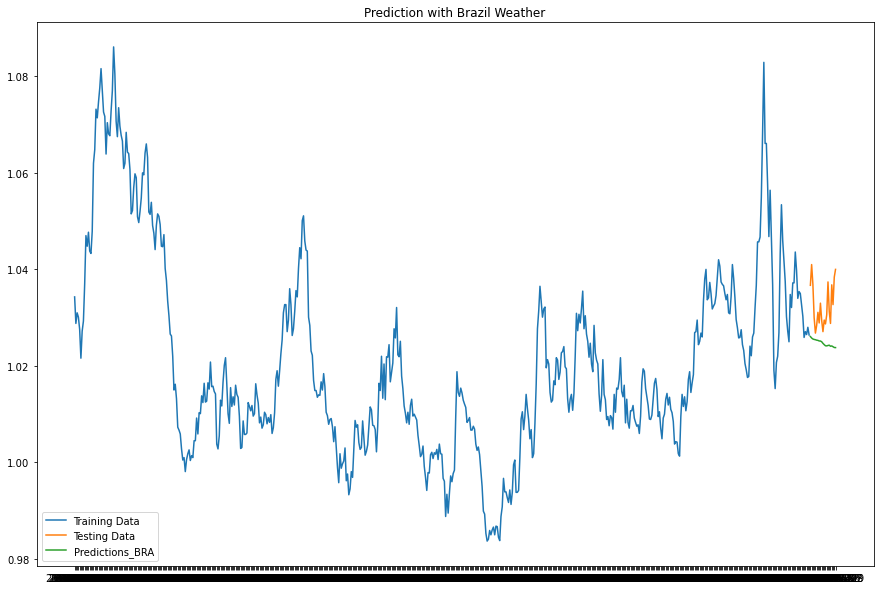

In [14]:
# Summary and plot for Brazil location
print(result_bra.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_bra.index, train_data_bra['Close'], label='Training Data')
plt.plot(test_data_bra.index, test_data_bra['Close'], label='Testing Data')
plt.plot(pred_bra.index, pred_bra['Predictions_BRA'], label='Predictions_BRA')

plt.title('Prediction with Brazil Weather')
plt.legend(loc='best')
plt.show()

In [15]:
from sklearn.metrics import r2_score
r2_score(test_data_bra['Close'], pred_bra['Predictions_BRA'])

-3.2672294533778574

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  584
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2353.113
Method:                           css   S.D. of innovations              0.004
Date:                Sat, 08 Apr 2023   AIC                          -4696.226
Time:                        00:51:05   BIC                          -4674.377
Sample:                             1   HQIC                         -4687.710
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003      0.001      0.316      0.752      -0.001       0.002
Mean_Temp      -2.442e-05   3.65e-05     -0.669      0.504    -9.6e-05    4.72e-05
Mean_Precip       -0.0013      0.002

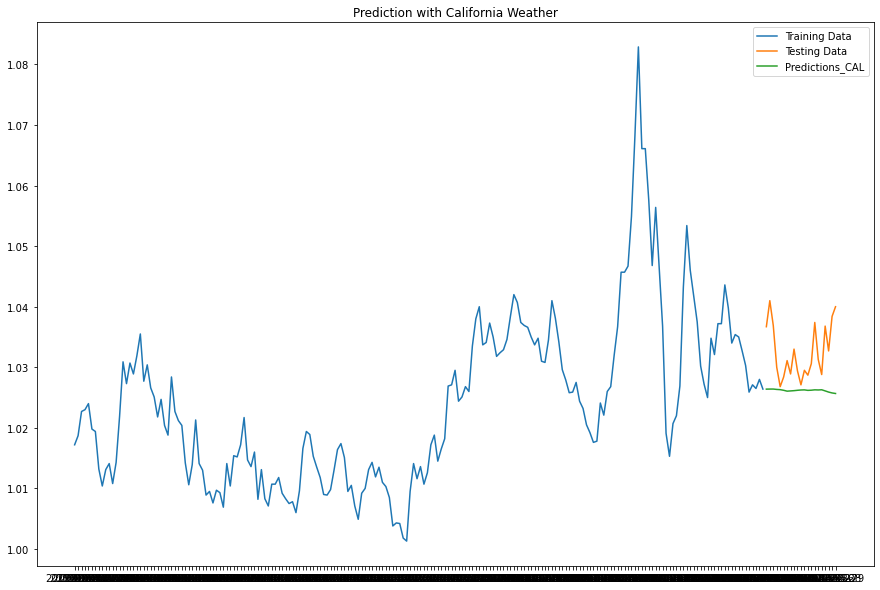

In [16]:
# Summary and plot for California location
print(result_cal.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_cal.index[-200:], train_data_cal['Close'][-200:], label='Training Data')
plt.plot(test_data_cal.index, test_data_cal['Close'], label='Testing Data')
plt.plot(pred_cal.index, pred_cal['Predictions_CAL'], label='Predictions_CAL')

plt.title('Prediction with California Weather')
plt.legend(loc='best')
plt.show()

In [17]:
from sklearn.metrics import r2_score
r2_score(test_data_cal['Close'], pred_cal['Predictions_CAL'])

-2.1851648272820623

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  584
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2353.135
Method:                           css   S.D. of innovations              0.004
Date:                Sat, 08 Apr 2023   AIC                          -4696.270
Time:                        00:51:07   BIC                          -4674.420
Sample:                             1   HQIC                         -4687.754
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0003      0.001     -0.455      0.649      -0.001       0.001
Mean_Temp       1.446e-06   1.84e-05      0.079      0.937   -3.46e-05    3.75e-05
Mean_Precip       -0.0007      0.001

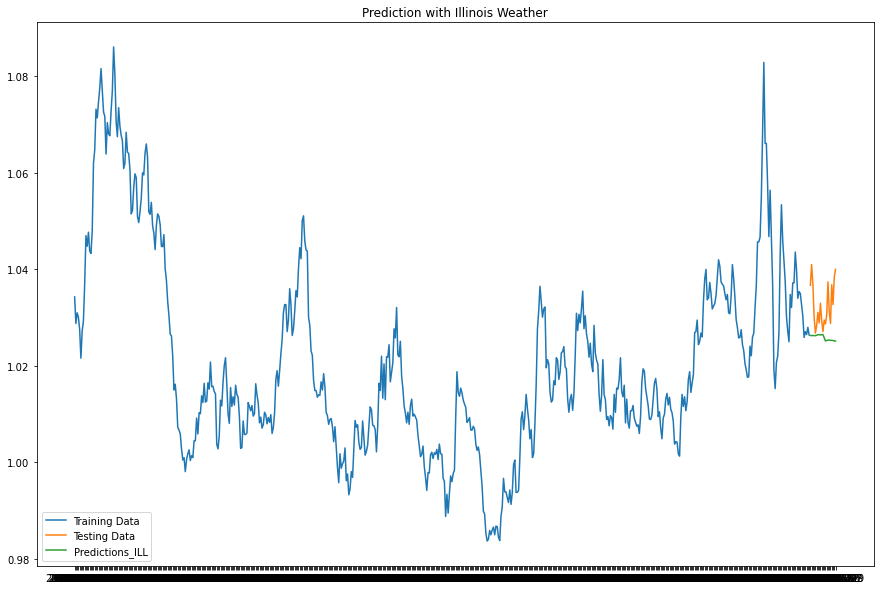

In [18]:
# Summary and plot for Illinois location
print(result_ill.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_ill.index, train_data_ill['Close'], label='Training Data')
plt.plot(test_data_ill.index, test_data_ill['Close'], label='Testing Data')
plt.plot(pred_ill.index, pred_ill['Predictions_ILL'], label='Predictions_ILL')

plt.title('Prediction with Illinois Weather')
plt.legend(loc='best')
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2_score(test_data_ill['Close'], pred_ill['Predictions_ILL'])

-2.462503402808013

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  584
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2352.942
Method:                           css   S.D. of innovations              0.004
Date:                Sat, 08 Apr 2023   AIC                          -4695.885
Time:                        00:51:11   BIC                          -4674.035
Sample:                             1   HQIC                         -4687.369
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0001      0.001     -0.232      0.816      -0.001       0.001
Mean_Temp       3.196e-06   1.65e-05      0.194      0.846   -2.92e-05    3.56e-05
Mean_Precip       -0.0007      0.001

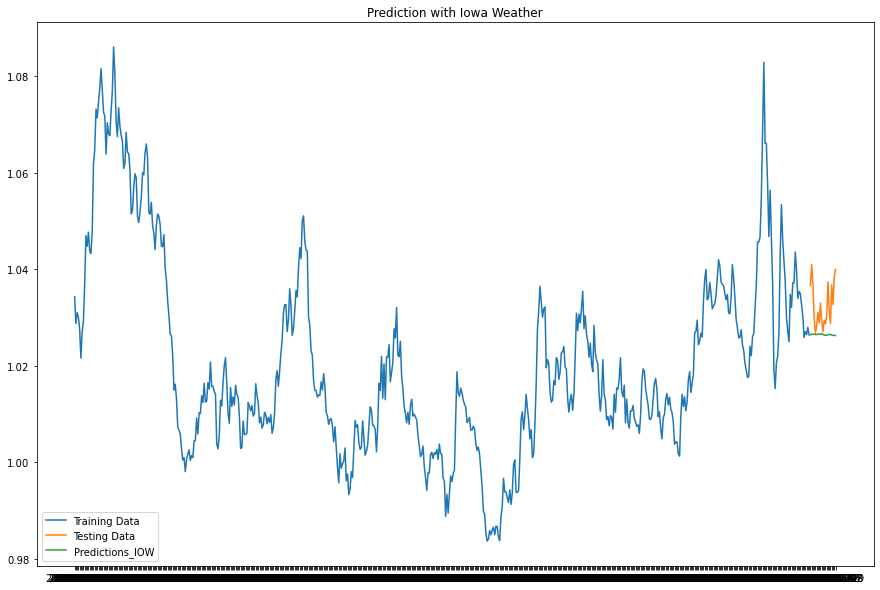

In [20]:
# Summary and plot for Iowa location
print(result_iow.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_iow.index, train_data_iow['Close'], label='Training Data')
plt.plot(test_data_iow.index, test_data_iow['Close'], label='Testing Data')
plt.plot(pred_iow.index, pred_iow['Predictions_IOW'], label='Predictions_IOW')

plt.title('Prediction with Iowa Weather')
plt.legend(loc='best')
plt.show()

In [21]:
from sklearn.metrics import r2_score
r2_score(test_data_iow['Close'], pred_iow['Predictions_IOW'])

-1.9788891244716602

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  584
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2353.122
Method:                           css   S.D. of innovations              0.004
Date:                Sat, 08 Apr 2023   AIC                          -4696.245
Time:                        00:51:14   BIC                          -4674.395
Sample:                             1   HQIC                         -4687.729
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.829e-05      0.001     -0.055      0.956      -0.001       0.001
Mean_Temp       7.022e-06   1.53e-05      0.458      0.647    -2.3e-05    3.71e-05
Mean_Precip       -0.0013      0.002

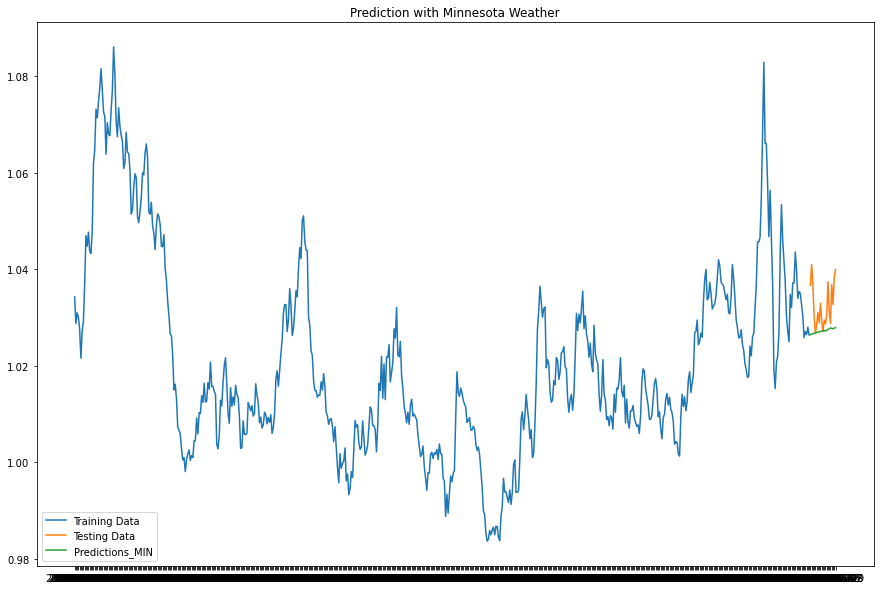

In [22]:
# Summary and plot for Minnesota location
print(result_min.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_min.index, train_data_min['Close'], label='Training Data')
plt.plot(test_data_min.index, test_data_min['Close'], label='Testing Data')
plt.plot(pred_min.index, pred_min['Predictions_MIN'], label='Predictions_MIN')

plt.title('Prediction with Minnesota Weather')
plt.legend(loc='best')
plt.show()

In [23]:
from sklearn.metrics import r2_score
r2_score(test_data_min['Close'], pred_min['Predictions_MIN'])

-1.48077785700842

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  584
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2353.502
Method:                           css   S.D. of innovations              0.004
Date:                Sat, 08 Apr 2023   AIC                          -4697.005
Time:                        00:51:18   BIC                          -4675.155
Sample:                             1   HQIC                         -4688.489
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.001      0.693      0.488      -0.001       0.002
Mean_Temp      -8.904e-06   1.71e-05     -0.521      0.602   -4.24e-05    2.46e-05
Mean_Precip        0.0013      0.001

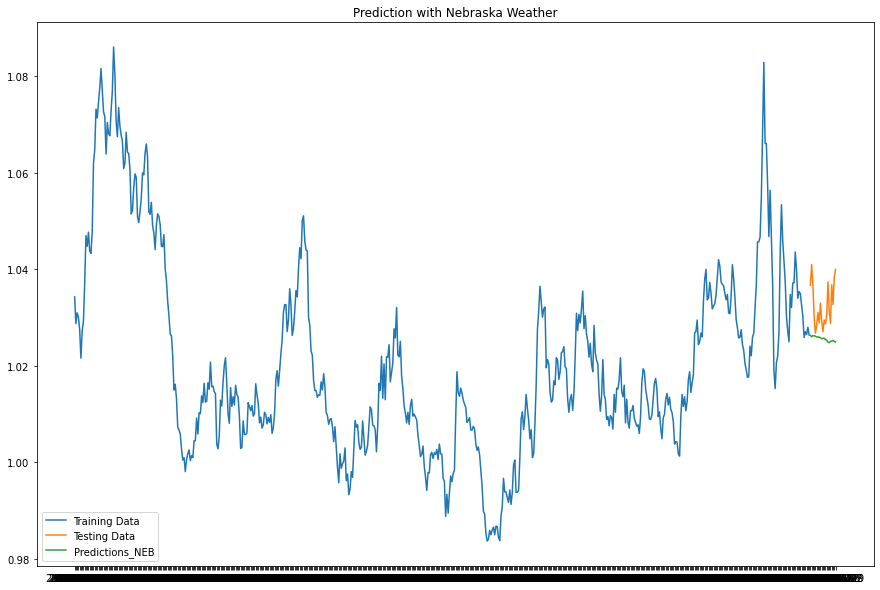

In [24]:
# Summary and plot for Nebraska location
print(result_neb.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_neb.index, train_data_neb['Close'], label='Training Data')
plt.plot(test_data_neb.index, test_data_neb['Close'], label='Testing Data')
plt.plot(pred_neb.index, pred_neb['Predictions_NEB'], label='Predictions_NEB')

plt.title('Prediction with Nebraska Weather')
plt.legend(loc='best')
plt.show()

In [25]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred_neb['Predictions_NEB'])

-2.610838879653939

In [ ]:
# Concatenate weather data for all locations
exog_train_all = pd.concat([exog_train_arg.add_suffix('_arg'), exog_train_bra.add_suffix('_bra'), 
                            exog_train_cal.add_suffix('_cal'), exog_train_ill.add_suffix('_ill'), 
                            exog_train_iow.add_suffix('_iow'), exog_train_min.add_suffix('_min'), 
                            exog_train_neb.add_suffix('_neb')], axis=1)
exog_test_all = pd.concat([exog_test_arg, exog_test_bra, exog_test_cal, exog_test_ill, 
                           exog_test_iow, exog_test_min, exog_test_neb], axis=1)

exog_train_all.dropna(inplace=True)


# Fit the ARIMA model with exogenous variables
model = sm.tsa.ARIMA(train_data_arg['Close'], order=(0,1,0), exog=exog_train_all)

# Train the model
result = model.fit()

In [27]:
# Print the summary of the model
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  584
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2360.527
Method:                           css   S.D. of innovations              0.004
Date:                Sat, 08 Apr 2023   AIC                          -4675.054
Time:                        00:51:22   BIC                          -4574.547
Sample:                             1   HQIC                         -4635.881
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0040      0.005      0.826      0.409      -0.006       0.014
Mean_Temp_arg      -2.555e-05   7.04e-05     -0.363      0.717      -0.000       0.000
Mean_Precip_arg     

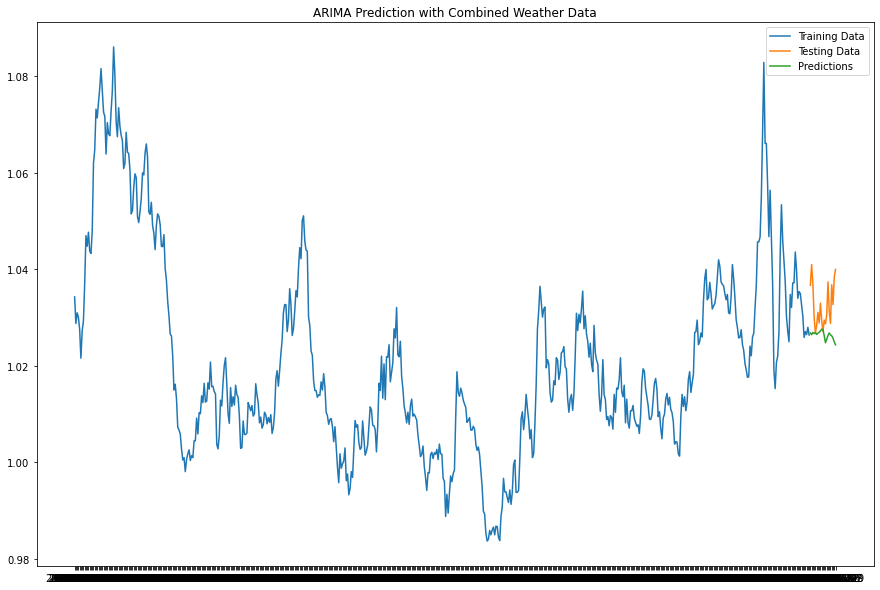

In [28]:
# Forecast
pred = result.forecast(steps=21, exog=exog_test_all)
pred = pd.DataFrame(pred[0], index=test_data_arg.index, columns=['Predictions_ALL'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred.index, pred['Predictions_ALL'], label='Predictions')
plt.legend(loc='best')
plt.title('ARIMA Prediction with Combined Weather Data')
plt.show()

In [29]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred['Predictions_ALL'])

-2.2113927288188457

In [ ]:
# Fit the ARIMA model with exogenous variables
model = sm.tsa.ARIMA(train_data_arg['Close'], order=(2,1,2), exog=exog_train_all)

# Train the model
result = model.fit()

# Print the summary of the model
print(result.summary())

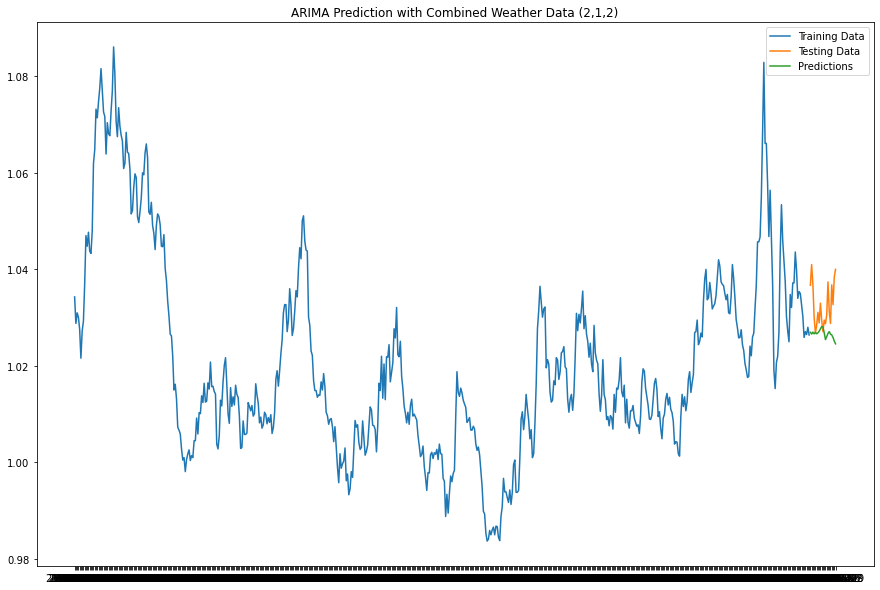

In [31]:
# Forecast
pred = result.forecast(steps=21, exog=exog_test_all)
pred = pd.DataFrame(pred[0], index=test_data_arg.index, columns=['Predictions_ALL'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred.index, pred['Predictions_ALL'], label='Predictions')
plt.legend(loc='best')
plt.title('ARIMA Prediction with Combined Weather Data (2,1,2)')
plt.show()

In [32]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred['Predictions_ALL'])

-2.064006293157154